In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
SECURITY_LEVELS = np.array([1024,2048,3072])
LABELS = ["RSA(1024)","RSA(2048)","RSA(3072)"]
plt.rc('font', size=24)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title
# matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20) 

In [13]:
def plot(*args,**kwargs):
    data   = kwargs.get("data")
    title  = kwargs.get('title',"RSA encryption time by security level")
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel("Security Level")
    ax.set_ylabel("Time (Miliseconds)")
    ax.set_xticks(SECURITY_LEVELS)
    labels =["RSA(1024)","RSA(2048)","RSA(3072)"]
#     colors = ["blue","red","black"]
    colors =["#03A9F4","#E040FB","#FF4081"]
    for (color,label,level,data) in zip(colors,labels,SECURITY_LEVELS,data):
        ax.bar(level,height =data,width=1000,label=label,color=color)
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.05, 1))
    
def plott(*args,**kwargs):
    data0   = kwargs.get('data0')
    data1   = kwargs.get('data1')
    figsize = kwargs.get('figsize',(10,10))
    ylabel  = kwargs.get('ylabel','Time (Milliseconds)')
    xlabel  = kwargs.get('xlabel','Security level')
    xticks  = kwargs.get('xticks',SECURITY_LEVELS)
    labels0 = kwargs.get('labels0')
    labels1 = kwargs.get('labels1')
    title   = kwargs.get('title',"Simple title") 
    colors  =["#1976D2", "#512DA8","#C2185B"]
    colors2 =["#03A9F4","#E040FB","#FF4081"]
    fig,ax  = plt.subplots(figsize=figsize)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_xticks(xticks)
    
    for (level,color,data,label,e,c2,l1) in zip(xticks,colors,data0,labels0,data1,colors2,labels1):
        ax.bar(level,height=data,width=500,color=color,label=label,bottom=e)
        ax.bar(level,height=e,width=500,color=c2,label=l1)
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.05, 1))

In [4]:
df   = pd.read_csv("data.csv")
df.drop(['MESSAGE'],axis=1,inplace=True)
pdf  = df.pivot_table(index=['SECURITY_LEVEL'])
pcol = pdf.columns
decrypt = pdf[pcol[0]].to_numpy()
encrypt = pdf[pcol[1]].to_numpy()

# Grafica de decifrado
Rendimiento del decifrado utilizando RSA con 3 niveles de seguridad.

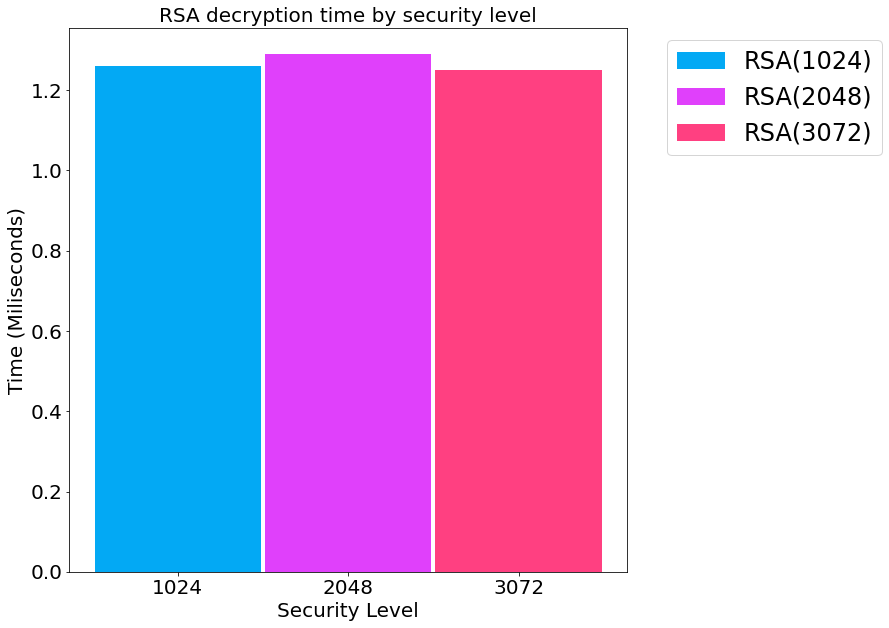

In [14]:
plot(data=decrypt, title="RSA decryption time by security level")

# Grafica de cifrado
Rendimiento de cifrado utilizando RSA con 3 niveles de seguridad, se muetran por separados los tiempos que requerieron las operaciones de cifrado y de generacion del par de llaves.

In [7]:
data = df[['SECURITY_LEVEL','KEYPAIR_TIME','ENCRYPT_TIME','DECRYPT_TIME']]
SL   =  'SECURITY_LEVEL' 
pdf0  = data.pivot_table(index=[SL])

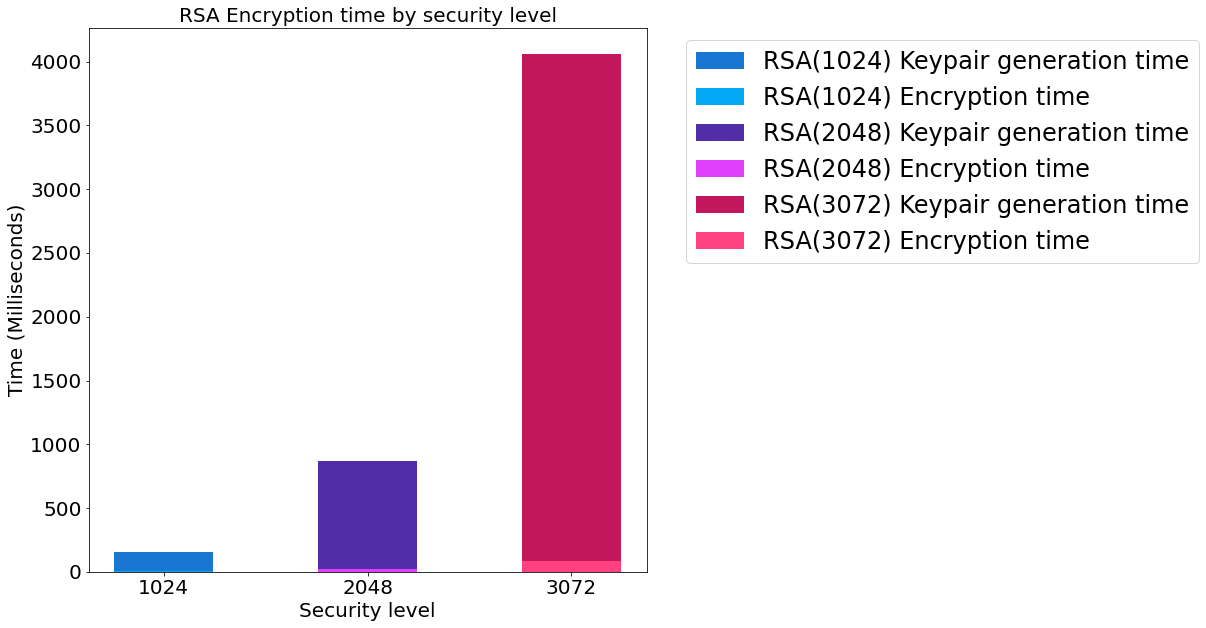

In [8]:
data0 = pdf0['ENCRYPT_TIME'].to_numpy()
data1 = pdf0['KEYPAIR_TIME'].to_numpy()
title = "RSA Encryption time by security level"
labels0 =  list(map(lambda x: x+" Encryption time",LABELS))
labels1 =  list(map(lambda x: x+ " Keypair generation time",LABELS)) 
plott(data1 =data0,data0=data1,title=title,labels1=labels0,labels0=labels1)

# RSA Digital Signatures 
Rendimiento de firmas digitales utilizando RSA, se mide el tiempo de hashing y de cifrado de manera independiente, y se grafican en colors distintos, la suma de los tiempos de hashing y cifrado dan el tiempo total del proceso que toma la firma digital.

In [9]:
df0  = pd.read_csv("data01.csv")
mb1 = df0[df0['FILE_SIZE']=='sample']
mb10 = df0[df0['FILE_SIZE']=='sample_10']
mb100 = df0[df0['FILE_SIZE']=='sample_100']

# RSA Digital Signature - 1MB File

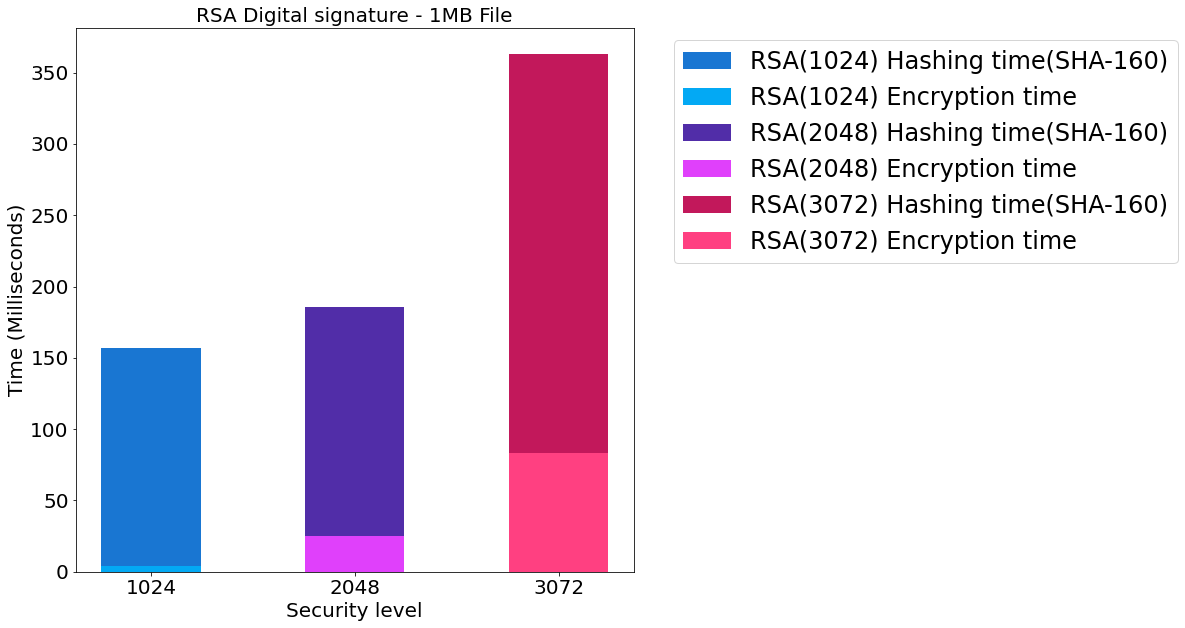

In [17]:
hashTime    = mb1['HASH_TIME'].to_numpy()
encryptTime = mb1['ENCRYPT_TIME'].to_numpy()
labels0     = lambda y : list(map(lambda x:x+" Hashing time({})".format(y),["RSA(1024)","RSA(2048)","RSA(3072)"]))
labels1     = list(map(lambda x:x+" Encryption time",["RSA(1024)","RSA(2048)","RSA(3072)"]))
title       = "RSA Digital signature - 1MB File"
plott(data0=hashTime,data1=encryptTime,labels0=labels0("SHA-160"),labels1=labels1, title=title)

# RSA Digital Signature - 10MB File

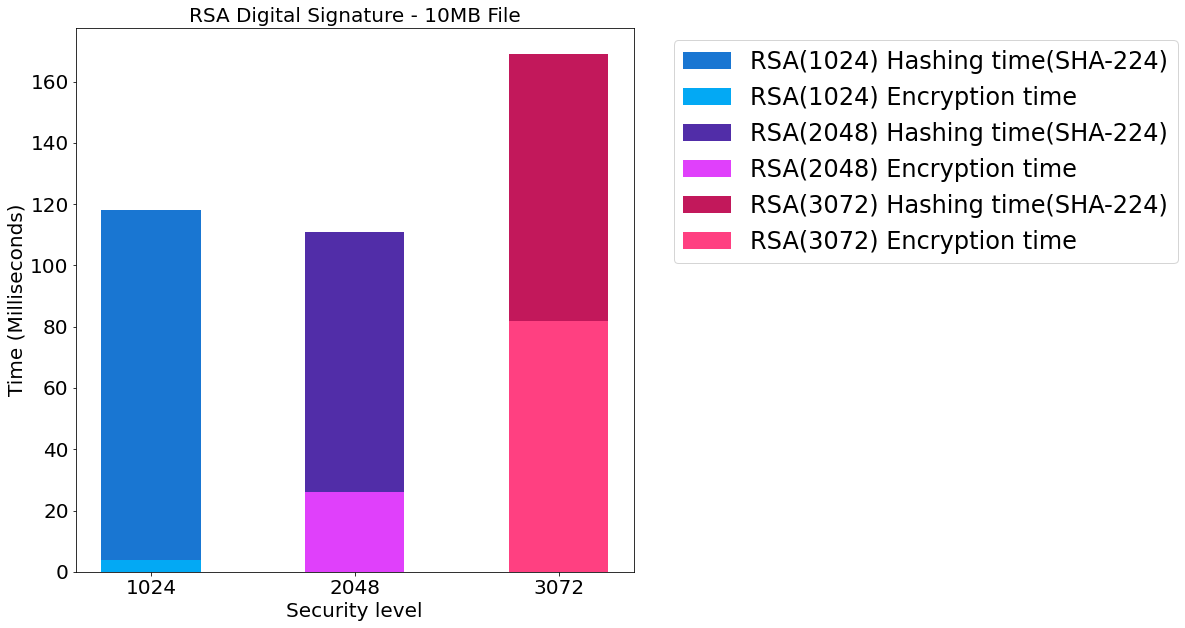

In [18]:
hashTime2    = mb10['HASH_TIME'].to_numpy()
encryptTime2 = mb10['ENCRYPT_TIME'].to_numpy()
title       = "RSA Digital Signature - 10MB File"
plott(data0=hashTime2,data1=encryptTime2,labels0=labels0("SHA-224"),labels1=labels1, title=title)

# RSA Digital Signature - 100MB File

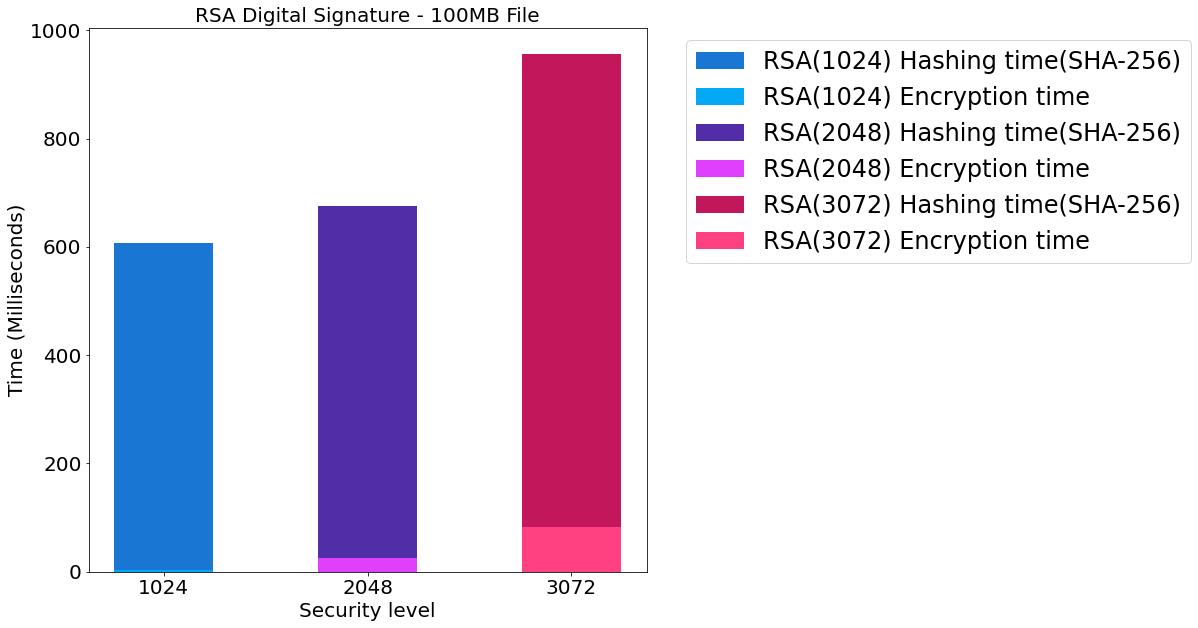

In [19]:
hashTime2    = mb100['HASH_TIME'].to_numpy()
encryptTime2 = mb100['ENCRYPT_TIME'].to_numpy()
title       = "RSA Digital Signature - 100MB File"
plott(data0=hashTime2,data1=encryptTime2,labels0=labels0("SHA-256"),labels1=labels1, title=title)